In [1]:
import pandas as pd
import numpy as np
import os,sys
import ROOT as rt

Welcome to JupyROOT 6.26/02


In [43]:
save_ = True

In [3]:
data = pd.read_csv('Fig8_Result.txt', delimiter='\t',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,X_Result,Y_Result,ErrorXhigh_Result,ErrorXlow_Result,ErrorYhigh_Result,ErrorYlow_Result,X_Uncertainty,Y_ExpStat,Y_SimStat,Y_BkgSys,Y_CutEffSys,Y_FanoSys,Y_NeutronXsecSys
1,0.39,0.0435803,0.003305,0.003305,0.00859725,0.00921734,0.39,0.00450636,0.0047183,0.00499212,0.00522813,0.00571165,0.00939081
2,0.396617,0.0437894,0.003305,0.003305,0.00860949,0.00923237,0.396617,0.00450898,0.00472103,0.0049954,0.00523185,0.00571776,0.00940684
3,0.403233,0.0440042,0.003305,0.003305,0.00862091,0.00924664,0.403233,0.00451087,0.00472298,0.00499796,0.00523483,0.00572321,0.00942215
4,0.40985,0.044218,0.003305,0.003305,0.00863209,0.00926066,0.40985,0.00451259,0.00472476,0.00500043,0.00523771,0.00572854,0.00943721


In [4]:
data.columns = [i for i in data.iloc[0]]
title = [i for i in data.iloc[0]]
data = data.drop([0])
data.head()

,X_Result,Y_Result,ErrorXhigh_Result,ErrorXlow_Result,ErrorYhigh_Result,ErrorYlow_Result,X_Uncertainty,Y_ExpStat,Y_SimStat,Y_BkgSys,Y_CutEffSys,Y_FanoSys,Y_NeutronXsecSys
1,0.39,0.0435803,0.003305,0.003305,0.00859725,0.00921734,0.39,0.00450636,0.0047183,0.00499212,0.00522813,0.00571165,0.00939081
2,0.396617,0.0437894,0.003305,0.003305,0.00860949,0.00923237,0.396617,0.00450898,0.00472103,0.0049954,0.00523185,0.00571776,0.00940684
3,0.403233,0.0440042,0.003305,0.003305,0.00862091,0.00924664,0.403233,0.00451087,0.00472298,0.00499796,0.00523483,0.00572321,0.00942215
4,0.40985,0.044218,0.003305,0.003305,0.00863209,0.00926066,0.40985,0.00451259,0.00472476,0.00500043,0.00523771,0.00572854,0.00943721
5,0.416466,0.0444308,0.003305,0.003305,0.00864304,0.00927444,0.416466,0.00451416,0.00472638,0.0050028,0.00524049,0.00573376,0.00945201


In [5]:
title

['X_Result',
 'Y_Result',
 'ErrorXhigh_Result',
 'ErrorXlow_Result',
 'ErrorYhigh_Result',
 'ErrorYlow_Result',
 'X_Uncertainty',
 'Y_ExpStat',
 'Y_SimStat',
 'Y_BkgSys',
 'Y_CutEffSys',
 'Y_FanoSys',
 'Y_NeutronXsecSys']

In [8]:
i = 'Result'
non_null = data['X_%s'%(i)].notna()
x = pd.to_numeric(data['X_%s'%(i)][non_null], errors='coerce')
y = pd.to_numeric(data['Y_%s'%(i)][non_null], errors='coerce')
exh = pd.to_numeric(data['ErrorXhigh_%s'%(i)][non_null], errors='coerce')
exl = pd.to_numeric(data['ErrorXlow_%s'%(i)][non_null], errors='coerce')
eyh = pd.to_numeric(data['ErrorYhigh_%s'%(i)][non_null], errors='coerce')
eyl = pd.to_numeric(data['ErrorYlow_%s'%(i)][non_null], errors='coerce')

temp_gr = rt.TGraphAsymmErrors()#(len(x),x,y,exl,exh,eyl,eyh)
for k in range(len(x)):
    temp_gr.SetPoint(k,(x.iloc[k]),y.iloc[k])
    temp_gr.SetPointError(k,exl.iloc[k],exh.iloc[k],eyl.iloc[k],eyh.iloc[k])
temp_gr.SetName(i)

Plots saved!!


Info in <TCanvas::Print>: png file ./plots/png/Fig_8a.png has been created
Info in <TCanvas::Print>: pdf file ./plots/pdf/Fig_8a.pdf has been created


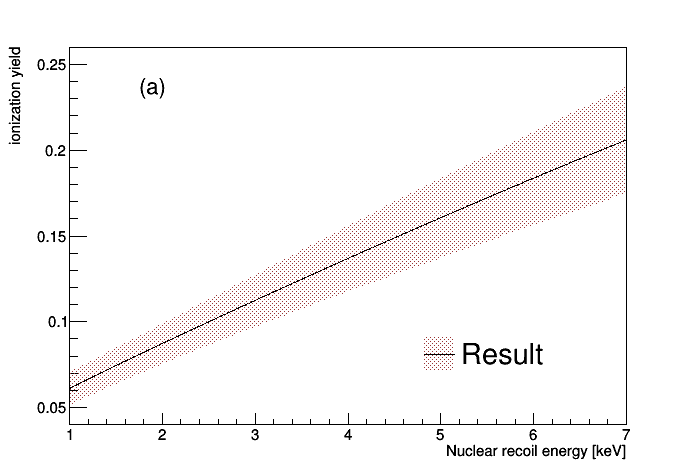

In [44]:
c = rt.TCanvas()

legend = rt.TLegend(0.6,0.3,0.85,0.2)
#legend.SetNColumns(3)
legend.SetBorderSize(0)

temp_gr.SetFillStyle(3003)
temp_gr.SetFillColor(rt.kRed-2)
temp_gr.SetLineColor(rt.kBlack)
temp_gr.SetMarkerColor(rt.kBlack)
temp_gr.Draw('AL3')
temp_gr.GetYaxis().SetRangeUser(0.04,0.26)
temp_gr.GetXaxis().SetLimits(1., 7.)
temp_gr.GetXaxis().SetTitle('Nuclear recoil energy [keV]')
temp_gr.GetYaxis().SetTitle('ionization yield')

legend.AddEntry(temp_gr,temp_gr.GetName(),'lf')

legend.Draw()
c.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.05);

textOnTop.DrawLatexNDC(0.2,0.8,"#bf{(a)}");

if(save_):
    c.SaveAs('./plots/png/Fig_8a.png')
    c.SaveAs('./plots/pdf/Fig_8a.pdf')
    print ('Plots saved!!')

In [21]:
title

['X_Result',
 'Y_Result',
 'ErrorXhigh_Result',
 'ErrorXlow_Result',
 'ErrorYhigh_Result',
 'ErrorYlow_Result',
 'X_Uncertainty',
 'Y_ExpStat',
 'Y_SimStat',
 'Y_BkgSys',
 'Y_CutEffSys',
 'Y_FanoSys',
 'Y_NeutronXsecSys']

In [28]:
cols = [i for i in title[7:]]
cols
legend_text = [i.split('_')[-1] for i in cols]
legend_text

['ExpStat', 'SimStat', 'BkgSys', 'CutEffSys', 'FanoSys', 'NeutronXsecSys']

In [26]:
non_null = data['X_Uncertainty'].notna()
x = pd.to_numeric(data['X_Uncertainty'][non_null], errors='coerce')
graphs = []
for i in cols:
    y = pd.to_numeric(data['%s'%(i)][non_null], errors='coerce')
    if(len(x) != len(y)):
        print('incompatible lengths for col %s'%(i))
        break
    gr = rt.TGraph()
    for j in range(len(x)):
        gr.SetPoint(j,x.iloc[j],y.iloc[j])
    gr.SetName(i)
    graphs.append(gr)
    del gr
    
    
for graph in graphs:
    print('Graph: %s'%(graph.GetName()))

Graph Y_ExpStat
Graph Y_SimStat
Graph Y_BkgSys
Graph Y_CutEffSys
Graph Y_FanoSys
Graph Y_NeutronXsecSys


In [38]:
line_color = [rt.kCyan - 2, rt.kGray, rt.kYellow+2, rt.kGreen, rt.kMagenta, rt.kRed+2]

Plots saved!!


Info in <TCanvas::Print>: png file ./plots/png/Fig_8b.png has been created
Info in <TCanvas::Print>: pdf file ./plots/pdf/Fig_8b.pdf has been created


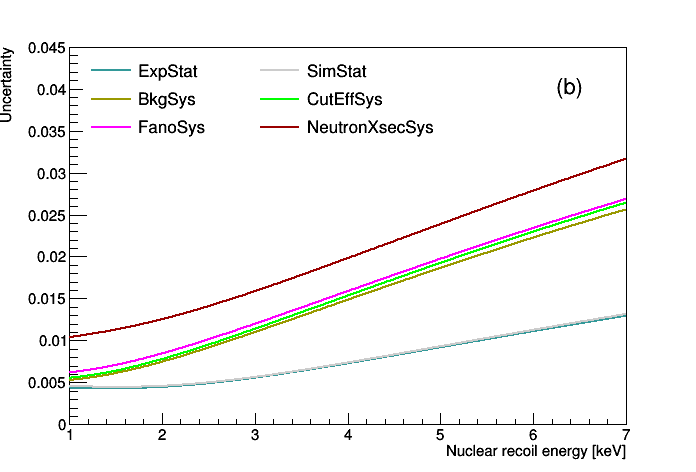

In [45]:
legend = rt.TLegend(0.12,0.88,0.75,0.7)
legend.SetNColumns(2)
legend.SetTextSize(0.04)
legend.SetBorderSize(0)

for i,graph in enumerate(graphs):
    
    graph.SetLineColor(line_color[i])
    graph.SetLineWidth(2)
    if(i == 0):
        graph.Draw('AL')
    else:
        graph.Draw('L SAME')
    graph.GetYaxis().SetRangeUser(0.,0.045)
    graph.GetXaxis().SetLimits(1., 7.)
    
    graph.GetXaxis().SetTitle('Nuclear recoil energy [keV]')
    graph.GetYaxis().SetTitle('Uncertainty')
    
    legend.AddEntry(graph,legend_text[i],'l')
    

legend.Draw()
c.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.05);

textOnTop.DrawLatexNDC(0.8,0.8,"#bf{(b)}");

if(save_):
    c.SaveAs('./plots/png/Fig_8b.png')
    c.SaveAs('./plots/pdf/Fig_8b.pdf')
    print ('Plots saved!!')